<a href="https://colab.research.google.com/github/Mincheol2/VAAE/blob/main/TWR_VAE_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## PLEASE configure your path! ##
PATH = '/content/drive/MyDrive/modified-TWR_VAE' 

os.chdir(PATH)
os.getcwd()

'/content/drive/MyDrive/old_TWR-VAE/lang_model'

# Argument options

- dt : Dataset(ptb / yelp / yahoo)

- epoch : Learning epoch (Ex. ptb 200 epochs : about 30mins) 

- alpha : Alpha divergence parameter

- beta : Weight for alpha divergence

In [ ]:
!python main.py -dt ptb --epoch 10 --alpha 1.0 --beta 1.0 #Default KL Div

Namespace(batch_size=64, dataset='ptb', dropout=0.5, embedding_size=512, epochs=10, gpu_id='0', hidden_size=256, layers=1, load=False, lr=0.0001, min_word_count=1, model_dir='', no_cuda=False, partial=False, partial_type='last75', rnn_type='lstm', save=True, setting='standard', z_type='normal', zdim=32)
base_path= .
start to load Corpus data
start to build dictionary
start to make one-hot vectors
start to load Corpus data
start to build dictionary
start to make one-hot vectors
start to load Corpus data
start to build dictionary
start to make one-hot vectors
voca_dim=9947
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Encoder(
  (embedding): Embedding(9947, 512, padding_idx=0)
  (rnn): LSTM(512, 256, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)

# Visualization

The generated folder name contains dataset name, alpha, and beta. Put your parameters below, and visualize it.

In [ ]:
dataset = 'ptb'
alpha = 1.0
beta = 1.0

In [ ]:
result = pd.read_csv(f'{dataset}_recon_save_alpha' + str(alpha) + '_beta' + str(beta) +'/test_TWRvae_loss.txt',sep='\t')
result.columns=['ep', 'recon_loss', 'div_loss', 'NLL', 'PPL'] 

result

,ep,recon_loss,div_loss,NLL,PPL
0,1,139.519130,0.067387,139.586517,397.687659
1,2,135.221386,0.074404,135.295790,330.853115
2,3,132.529789,0.071159,132.600948,294.746566
3,4,130.522596,0.067431,130.590026,270.395234
4,5,128.624608,0.060978,128.685585,249.190984
5,6,126.597023,0.051551,126.648574,228.347748
6,7,125.161177,0.047617,125.208794,214.675994
7,8,123.631813,0.045483,123.677296,201.030591
8,9,122.143297,0.042181,122.185478,188.573120
9,10,120.736888,0.040408,120.777297,177.523148


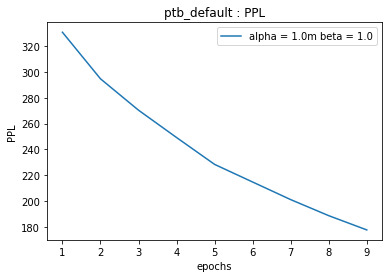

In [ ]:
start_epoch = 1
end_epoch = 50 
plt.plot(result['PPL'].loc[start_epoch:50], label=f'alpha = {alpha}, beta = {beta}')
plt.title(f'ptb_default : PPL')
plt.xlabel('epochs')
plt.ylabel('PPL')
plt.legend()
plt.show()